In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("AmazonSpeakerReviewRefined.csv")

In [3]:
df.head()

,Name,Stars,Reviewed_Country,Date,Verified,HelpfulVotes,Title,Review
0,Parag,1,India,19/10/2018,False,2248,Very poor sound recognition.,It definitely has better speakers than Eco Dot...
1,Chinmaya D.,5,India,15/10/2018,False,2965,My first Smart Speaker,This was launched on 11th and I got the produc...
2,Vishnu,5,India,22/12/2018,False,962,it’s amazing just read my review,The media could not be loaded. Such an amazin...
3,Rajiv p.,4,India,15/10/2018,False,647,Stunner!,It's totally Paisa wasoolSpeaker is loudShe li...
4,Aritra Daspoddar,4,India,19/02/2019,False,233,A real competition to Google Home mini,At first i was confused which one to buy - Goo...


In [5]:
df.shape

(5000, 8)

In [6]:
df.info

<bound method DataFrame.info of                    Name  Stars Reviewed_Country        Date  Verified  \
0                 Parag      1            India  19/10/2018     False   
1           Chinmaya D.      5            India  15/10/2018     False   
2                Vishnu      5            India  22/12/2018     False   
3              Rajiv p.      4            India  15/10/2018     False   
4      Aritra Daspoddar      4            India  19/02/2019     False   
...                 ...    ...              ...         ...       ...   
4995  vanisree vanamali      5            India  23/11/2019     False   
4996       asmit gangil      5            India  19/07/2020     False   
4997              Mueem      3            India  01/08/2021     False   
4998       Yogesh gowda      5            India  28/11/2019     False   
4999          Ramprasad      5            India  02/03/2020     False   

      HelpfulVotes                                        Title  \
0             2248      

In [7]:
df.Review.head()

0    It definitely has better speakers than Eco Dot...
1    This was launched on 11th and I got the produc...
2    The media could not be loaded.  Such an amazin...
3    It's totally Paisa wasoolSpeaker is loudShe li...
4    At first i was confused which one to buy - Goo...
Name: Review, dtype: object

In [9]:
df.Title.head()

0              Very poor sound recognition.
1                    My first Smart Speaker
2          it’s amazing just read my review
3                                  Stunner!
4    A real competition to Google Home mini
Name: Title, dtype: object

In [10]:
! pip install textblob

In [11]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word

In [13]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

In [14]:
df['Review'] = df['Review'].str.replace('[^\w\s]', "")
df.Review.head(5)

<ipython-input-14-63a9a285d9fe>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review'] = df['Review'].str.replace('[^\w\s]', "")


0    it definitely has better speakers than eco dot...
1    this was launched on 11th and i got the produc...
2    the media could not be loaded such an amazing ...
3    its totally paisa wasoolspeaker is loudshe lis...
4    at first i was confused which one to buy  goog...
Name: Review, dtype: object

In [16]:
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Review.head()

0    definitely better speakers eco dot gen2 google...
1    launched 11th got product 12th plus reduced pr...
2    media could loaded amazing product responds ev...
3    totally paisa wasoolspeaker loudshe listen wel...
4    first confused one buy google home mini echo d...
Name: Review, dtype: object

In [20]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [47]:
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Review.head()

0    definitely better speaker eco dot gen2 google ...
1    launched 11th got product 12th plus reduced pr...
2    medium could loaded amazing product responds e...
3    totally paisa wasoolspeaker loudshe listen wel...
4    first confused one buy google home mini echo d...
Name: Review, dtype: object

In [22]:
! pip install wordcloud

In [23]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [24]:
df.columns

Index(['Name', 'Stars', 'Reviewed_Country', 'Date', 'Verified', 'HelpfulVotes',
       'Title', 'Review'],
      dtype='object')

In [25]:
df.Stars.value_counts()

5    2536
4     989
1     671
3     521
2     283
Name: Stars, dtype: int64

<AxesSubplot:xlabel='Stars', ylabel='count'>

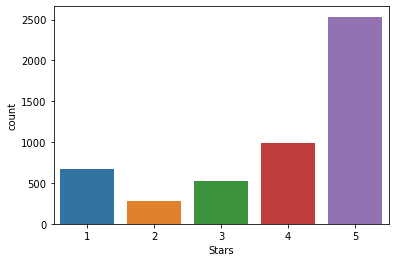

In [27]:
import seaborn as sns
sns.countplot(data = df, x = 'Stars')

In [28]:
reviews = df
reviews.dropna(inplace=True)

In [29]:
star_1 = reviews[reviews['Stars'] == 1]
star_2 = reviews[reviews['Stars'] == 2]
star_3 = reviews[reviews['Stars'] == 3]
star_4 = reviews[reviews['Stars'] == 4]
star_5 = reviews[reviews['Stars'] == 5]

In [31]:
reviews_sample = pd.concat([star_1,star_2,star_3,star_4,star_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

In [32]:
reviews_sample

,Name,Stars,Reviewed_Country,Date,Verified,HelpfulVotes,Title,Review
0,Parag,1,India,19/10/2018,False,2248,Very poor sound recognition.,definitely better speaker eco dot gen2 google ...
1,Kumar Gautam,1,India,13/10/2021,False,71,Not satisfied with the wipro smart bulb its no...,bought product gift one else come know product...
2,Amrish,1,India,15/10/2018,False,128,it does not support fire TV,device integration fire tv india dont smart pl...
3,Gems,1,India,04/10/2019,False,83,Google is infinitely better,even best device ruined poor software bad ui c...
4,mohsin(Genuine Review,1,India,28/10/2018,False,96,Cons,1we talk nearby2 general skill performing well...
...,...,...,...,...,...,...,...,...
4995,Manik Goyal,5,India,10/11/2019,False,0,Awesome sound,ultimate
4996,vanisree vanamali,5,India,23/11/2019,False,0,Excellent,excellent
4997,asmit gangil,5,India,19/07/2020,False,0,Amazing product,9 month working smooth without trouble
4998,Yogesh gowda,5,India,28/11/2019,False,0,Best for Indians but,still fails make cellular call n much


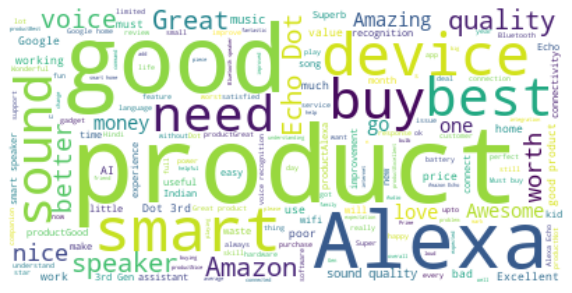

In [34]:
reviews_str = reviews_sample.Title.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
negative_reviews = reviews_sample[reviews_sample['Stars'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Stars'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.Title.str.cat()
positive_reviews_str = positive_reviews.Title.str.cat()

Text(0.5, 1.0, 'Reviews with Negative Scores')

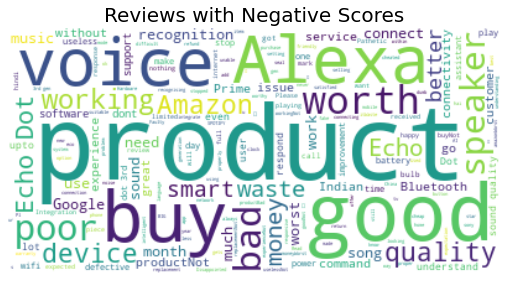

In [38]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

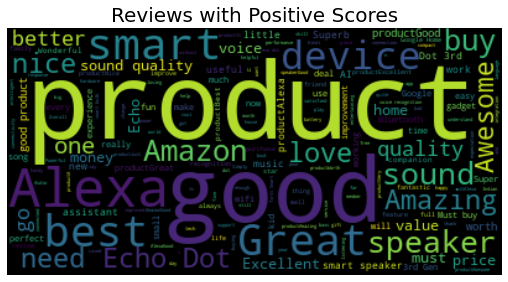

In [39]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

In [40]:
!pip install vaderSentiment

In [41]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [43]:
emptyline=[]
for row in df['Title']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.531,0.469,0.000,-0.5256
1,0.000,0.526,0.474,0.4019
2,0.000,0.568,0.432,0.5859
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000


In [44]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Name,Stars,Reviewed_Country,Date,Verified,HelpfulVotes,Title,Review,neg,neu,pos,compound
0,Parag,1,India,19/10/2018,False,2248,Very poor sound recognition.,definitely better speaker eco dot gen2 google ...,0.531,0.469,0.000,-0.5256
1,Chinmaya D.,5,India,15/10/2018,False,2965,My first Smart Speaker,launched 11th got product 12th plus reduced pr...,0.000,0.526,0.474,0.4019
2,Vishnu,5,India,22/12/2018,False,962,it’s amazing just read my review,medium could loaded amazing product responds e...,0.000,0.568,0.432,0.5859


In [45]:
# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,Name,Stars,Reviewed_Country,Date,Verified,HelpfulVotes,Title,Review,neg,neu,pos,compound,Sentiment
0,Parag,1,India,19/10/2018,False,2248,Very poor sound recognition.,definitely better speaker eco dot gen2 google ...,0.531,0.469,0.000,-0.5256,Negative
1,Chinmaya D.,5,India,15/10/2018,False,2965,My first Smart Speaker,launched 11th got product 12th plus reduced pr...,0.000,0.526,0.474,0.4019,Positive
2,Vishnu,5,India,22/12/2018,False,962,it’s amazing just read my review,medium could loaded amazing product responds e...,0.000,0.568,0.432,0.5859,Positive
3,Rajiv p.,4,India,15/10/2018,False,647,Stunner!,totally paisa wasoolspeaker loudshe listen wel...,0.000,1.000,0.000,0.0000,Positive
4,Aritra Daspoddar,4,India,19/02/2019,False,233,A real competition to Google Home mini,first confused one buy google home mini echo d...,0.000,1.000,0.000,0.0000,Positive


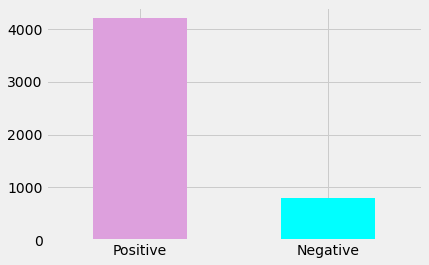

In [46]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);